In [93]:
#imports

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

plt.figure(figsize=(55,8))

#read data from excel
sales_df_mast = pd.read_excel("Sample - Superstore.xls")

#set start and end date for analaysis - choosing rolling 1 month
end = sales_df_mast['Order Date'].max()
start = datetime(end.year, end.month-6, end.day)

#filtering only required data
sales_df = sales_df_mast[sales_df_mast['Order Date'] >= start] 
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
23,24,US-2020-156909,2020-07-16,2020-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140.0,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
34,35,CA-2020-107727,2020-10-19,2020-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095.0,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
41,42,CA-2020-120999,2020-09-10,2020-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,60540.0,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
43,44,CA-2020-139619,2020-09-19,2020-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,32935.0,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616
71,72,CA-2020-114440,2020-09-14,2020-09-17,Second Class,TB-21520,Tracy Blumstein,Consumer,United States,Jackson,...,49201.0,Central,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,19.050,3,0.0,8.7630


<Figure size 3960x576 with 0 Axes>

In [94]:
# Q1: Show Sales, Profit, Profit per Order, Sales per Customer, Avg. Discount & Total Quantity
print(" Sales: %f \n Profit: %f\n Profit per Order: %f \n Sales per Customer: %f \n \
Avg. Discount: %f \n Total Quantity: %f" % (sales_df['Sales'].sum(), sales_df['Profit'].sum(),
                                            sales_df['Profit'].sum()/sales_df['Order ID'].count(),
                                            sales_df['Sales'].sum()/sales_df['Customer ID'].count(),
                                            sales_df['Discount'].sum()/sales_df['Discount'].count(),
                                            sales_df['Quantity'].count()))

 Sales: 481028.000000 
 Profit: 54569.525800
 Profit per Order: 25.583463 
 Sales per Customer: 225.517112 
 Avg. Discount: 0.152921 
 Total Quantity: 2133.000000


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

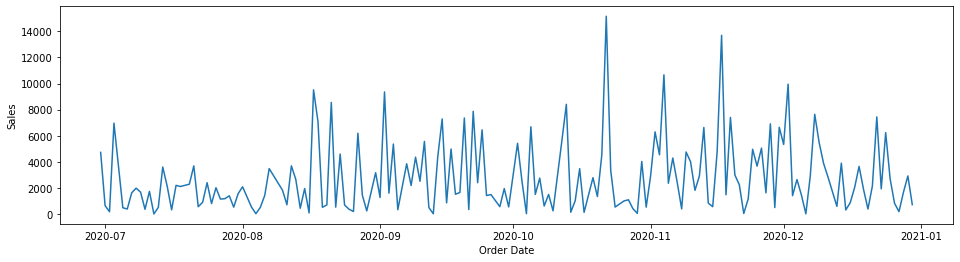

In [149]:
# Q2: Show sales by order date
plt.figure(figsize=(16, 4))
sns.lineplot(x='Order Date', y='Sales', data = sales_df, estimator = np.sum, ci = None)


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

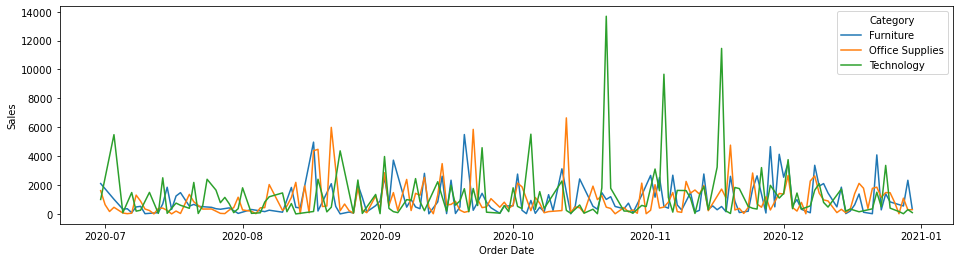

In [150]:
# Q3: Show sales by Category
plt.figure(figsize=(16, 4))
sns.lineplot(x='Order Date', y='Sales', data = sales_df, estimator = np.sum, hue='Category', ci = None)


<AxesSubplot:xlabel='Order Month', ylabel='Sales'>

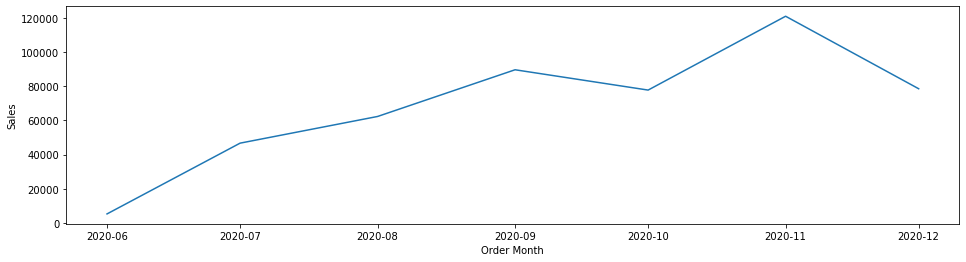

In [151]:
# Q4: Show monthly sales 
plt.figure(figsize=(16, 4))
q4_df = sales_df.copy()
q4_df['Order Month'] = pd.to_datetime(q4_df['Order Date']) + pd.offsets.MonthBegin(-1)

sns.lineplot(x='Order Month', y = 'Sales', data = q4_df.groupby(['Order Month']).sum())

<AxesSubplot:xlabel='Order Month', ylabel='Sales'>

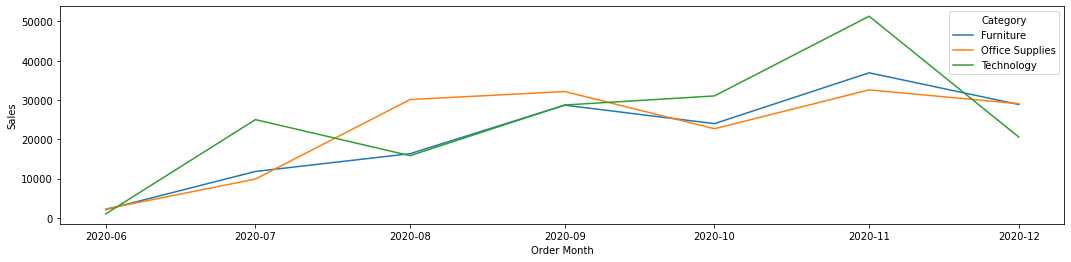

In [185]:
# Q5: Show monthly sales by Category
plt.figure(figsize=(18, 4))
q5_df = sales_df.copy()
q5_df['Order Month'] = pd.to_datetime(q4_df['Order Date']) + pd.offsets.MonthBegin(-1)

sns.lineplot(x='Order Month', y = 'Sales', data = q5_df.groupby(['Order Month', 'Category']).sum(), hue='Category')

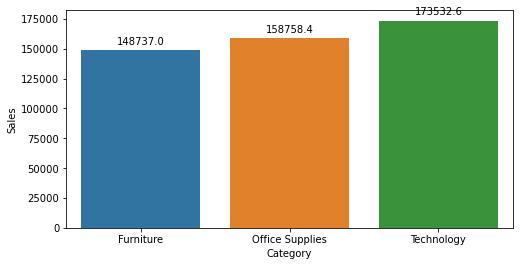

In [187]:
# Q6: Show sales by Category
plt.figure(figsize=(8, 4))
q6 = sns.barplot(x='Category', y='Sales', data=sales_df, estimator=np.sum, ci=None)
for p in q6.patches:
    q6.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

<AxesSubplot:xlabel='Category', ylabel='Sales'>

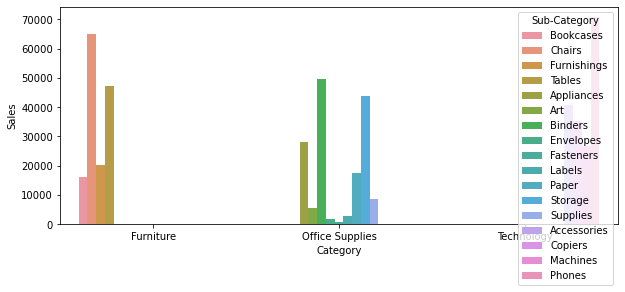

In [218]:
# Q7: Show sales by Category stacked by Subcategory
plt.figure(figsize=(10, 4))
#sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=sales_df, estimator=np.sum, ci=None)
q7_df = sales_df.groupby(['Category', 'Sub-Category']).sum()
q7_df.drop(columns = ['Row ID','Postal Code', 'Profit', 'Discount', 'Quantity'], inplace=True)
#type(q7_df)
q7_df.reset_index(drop=False, inplace=True)
#q7_df.info()
#q7_df
#q7_df.T.plot(x='Category', kind='bar', stacked=True)
#q7_df.set_index('Sub-Category').T.plot(kind='bar', stacked=True)
sns.barplot(x='Category', y='Sales', data=q7_df, hue='Sub-Category')